<div style="font-size:30px;text-align: center"><b> Convolutional Neural Networks </b></div>

# 1. Introduction

Convolutional Neural Networks (CNNs) are a variation of neural networks designed specifically for computer vision domain. It offers some advantages for image/video processing by considering the spatial structure of images.  

More precisely, CNNs take advantage of image spatial structure by considering edges and information about the location of a pixel. In an affine neural network the input (image) is considered as a vector and thus the spatial structure of the image is discarded. However, in CNNs, neurons in a layer will only be connected to a small region of the previous layer by a matrix called filter. In addition, affine neural networks don't scale very well to high resolution images. Although, in the case of MNIST dataset, which we are going to use it, images are size of 28x28x3 (28 wide, 28 high, 3 color channels), so a single fully connected layer would have 28x28x3 = 2353 weights which can be handled easily but this structure is not manageable for large images with many affine layers, e.g. 200x200x3, would lead neurons that have 200x200x3 = 120,000 weights. Thus, the number of parameters grows very fast which can be led to overfitting problem.

In this tutorial I am going to explain how CNNs work and how we can implement an image classifier using CNNs by Tensorflow platform. The data set used is MNIST which contains 240,000 training images, and 40,000 testing images.

# 2. CNNs in more depth

To understand bettter what CNN does, the overall view of a CNN is shown in figure below. In the following sections I am going to elaborate each part. However, it is noteworthy that the process of designing and implementing a CNN consist of two steps first learning and second using the learned model to predict. For now we just assume that we are given a learned CNN. In section 3, it will be explained how we can train a CNN.

In overall, every CNN consist of number of convolution layers followed by each other and one or more fully-connected layer(s) at the end. First, we focus on convolution layer and then at then end of this section fully-connected layers will be explained. 

Generally every convolutional layer consist of 3 parts:

1. Filters
2. Activation function
3. Pooling layer

I am going to explain each part seperately. So, in the following sections you may ask yourself how they are related to each other. Don't worry, I suggest you to keep reading. You will see how these parts come together.

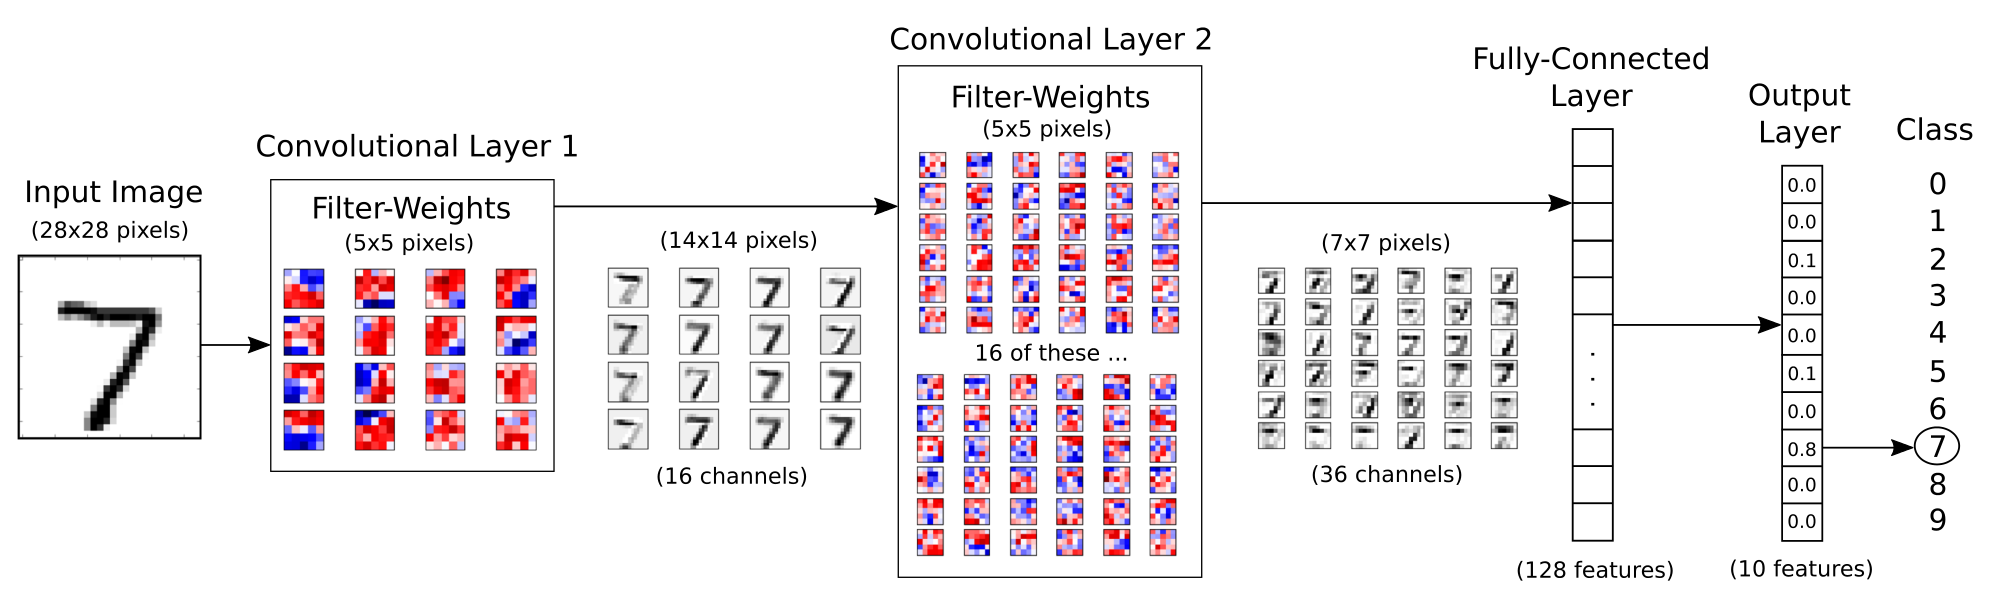

In [1]:
from IPython.display import Image
Image('images/tensor.png')

## 2.1. Filters

Filters are a set of matrices which are smaller than the input (orginal image) in size (dimensions). Filter is basically a matrix contains some magic numbers. These magic numbers are called weights. They are learned from dataset. We will see how they will be learned in section 3. The filters' dimentions are chosen arbitrary by you (experimental process) and it gets obtained by trial to find the best outcome. Each convolutional layer could have one or many filter(s). The number of filters in a convolutional layer is set by you in an experimental process. In our example, to keep every thing simple, we assume our inputs (images) are simple (9x9 pix) and they have only one channel (it means the images are black and white. No RGB chaneels). In additionan, our convolutioanl layer has only one 3 by 3 filter (imagine I have experimentally chosen the number of filter and its size).

In the first step, the filter (3 by 3 filter in our example) is moved over the entire picture. Each cell of filter is multiplied by its corresponding cell in the picture like the figure below. The step size by which the filter is moved from top left corner of the picture (coordination (0,0)) to the bottom right corner of the picture is called "stride". It is set by you. Finding the ture value for it is experimental. Machine learning engineers usually try differnt values and observe the results then pick the value with the best result. However, it is very common to set it to one. It means the filter is moved one pixel to right until it reaches the end of the frame then it is moved one pixel down and again starts from left side. It is repeated until it scans the whole picture. I used the term "scan" becuase in fact a filter is responsible to find a specific pattern in the entire picture. For example, consider the picture below. The filter scans the picture to find a straight line in the picture.

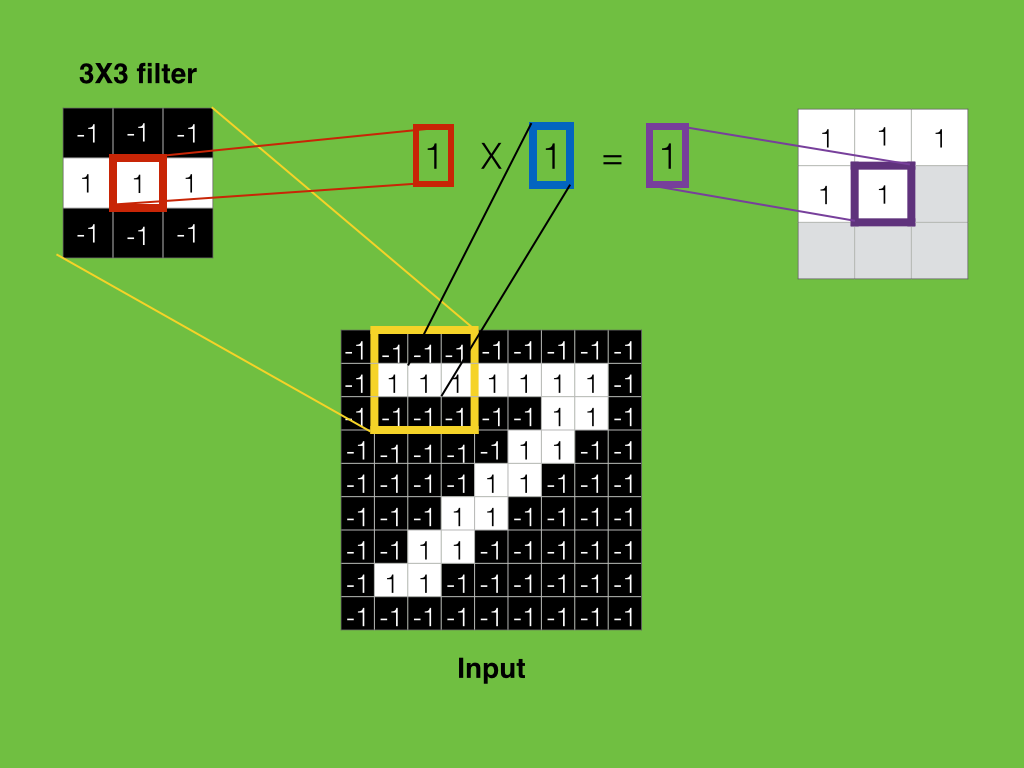

In [2]:
Image('images/CNN.png')

After scaning each region, the results are summed up and deivided by the number of the values (size of the filter). It is to normalize the numbers. If you have followed me up to this point you would be noticed scanning the picture will cuase the size of the picture to be shrinked. 

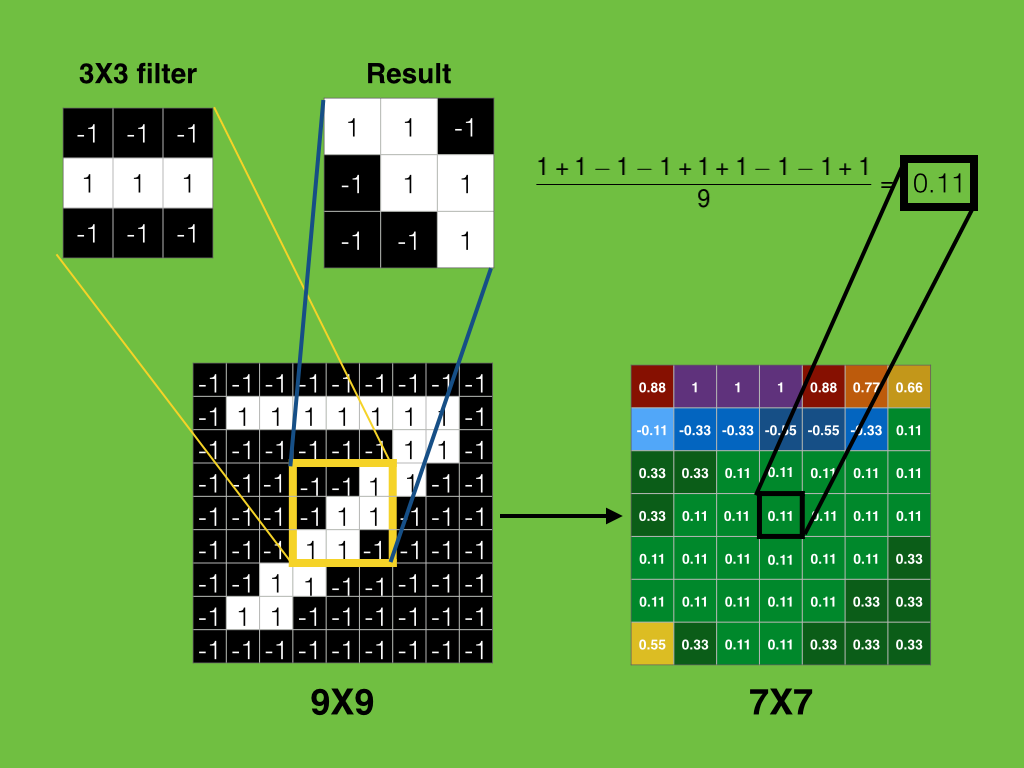

In [3]:
Image('images/Nor.png')

## 2.2. Activation function

The main idea of using activation functions on the output of filter is to capture non-linear feaures in data. Although, activation functions are used not only in CNNs but also in affine neural netwroks. There are some activaton functions used widely including sigmoid, tangent hyperbolic (tanh), soft plus, and rectified linear unit (ReLU). Each of them has some advantages and disadvantages. The question of which activation function should be used is a design question and depends on the data. The plot below shows how different activation functions work.

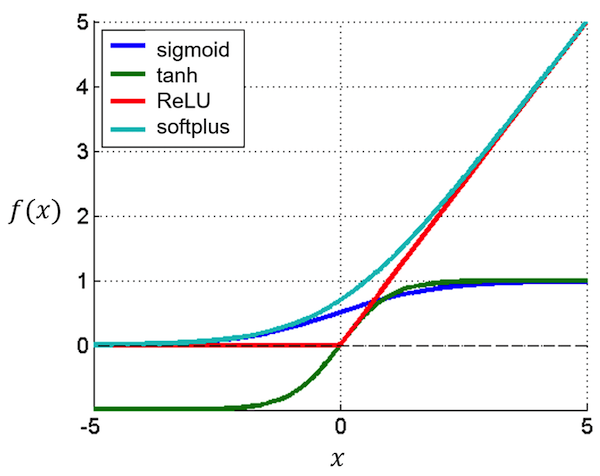

In [2]:
Image('images/activations.png')

In the picture below, rectified linear function is applied to the output of the filter. Rectified linear function is a simple function that turns nagative values to zero and left positive values intact. As you can see, it has marked the pattern straight line with zero values.

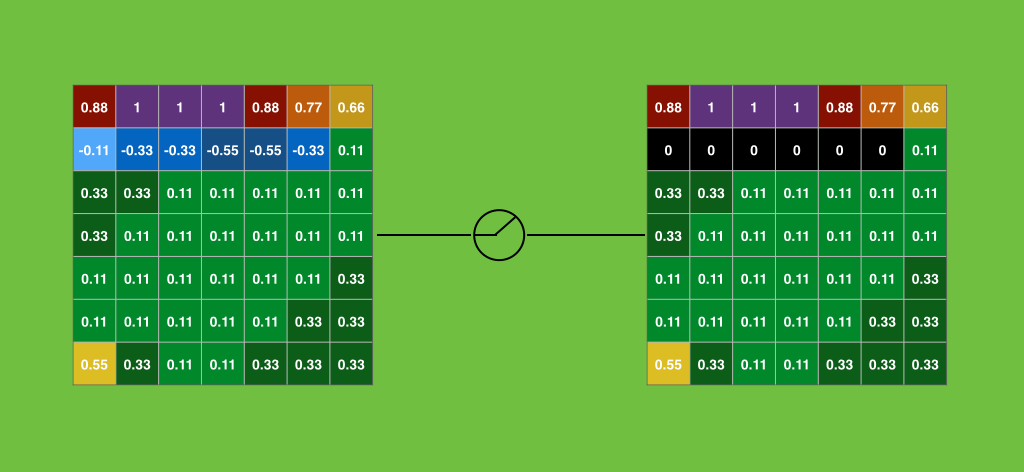

In [5]:
Image('images/RLU.png')

## 2.3. Polling layer

In polling layer, the activation funvtion's outome is sampled and shrinked. So far, we have looked at an example that the convolutional layer has only one filter. To show you why we need pooling layer let propose a question, what if the convolutional layer has more than one filter? Assume the convolutional layer has 150 filters which is quiet less than what is being used in real experiments. Then, each filter would have a 7X7 output which means there will be 150 7X7 outputs. This is just the beggining. What if our input images would have higher resolution (like 1600X1200 or even higher 9000X9000?) To solve this problem, polling layer is used to shrink the dimentions of the activation function output. There are two sort of polling layers, max polling and avg polling.

Like filters, polling layer is a sliding window which goes through the whole picture. Window size and stride needs to be chosen by you. Max pooling layer chooses the max value inside the window and similarly, avg polling calculates the average of the window.

In some cases the window goes beyond the boundary of the image. For example, imagine we pick stride with size 2. It causes the window goes out of the image boubdary at the end of frame. To solve this problem there are differnt ways. One common solution is to extend image boundary with zero. This is called zero padding. 

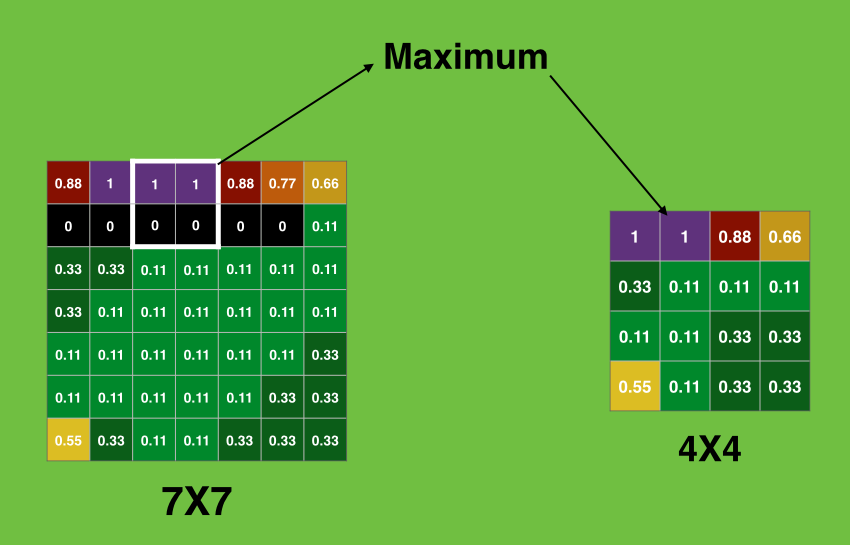

In [5]:
Image('images/polling.png')

## 2.4. Stack of filtered images

As mentioned before, a convolutional layer would have more than one filter and as a result the output of a convolutional layer is a set of matrices each of which is considered as a compact representation of a specific feature in the input. This set of outputs is later used as an input to the next convolution layer or if current layer is the last convolution layer then it is used to build a fully-connected layer for the last step of classification. 

The whole convolution layer is shown in the figure below.

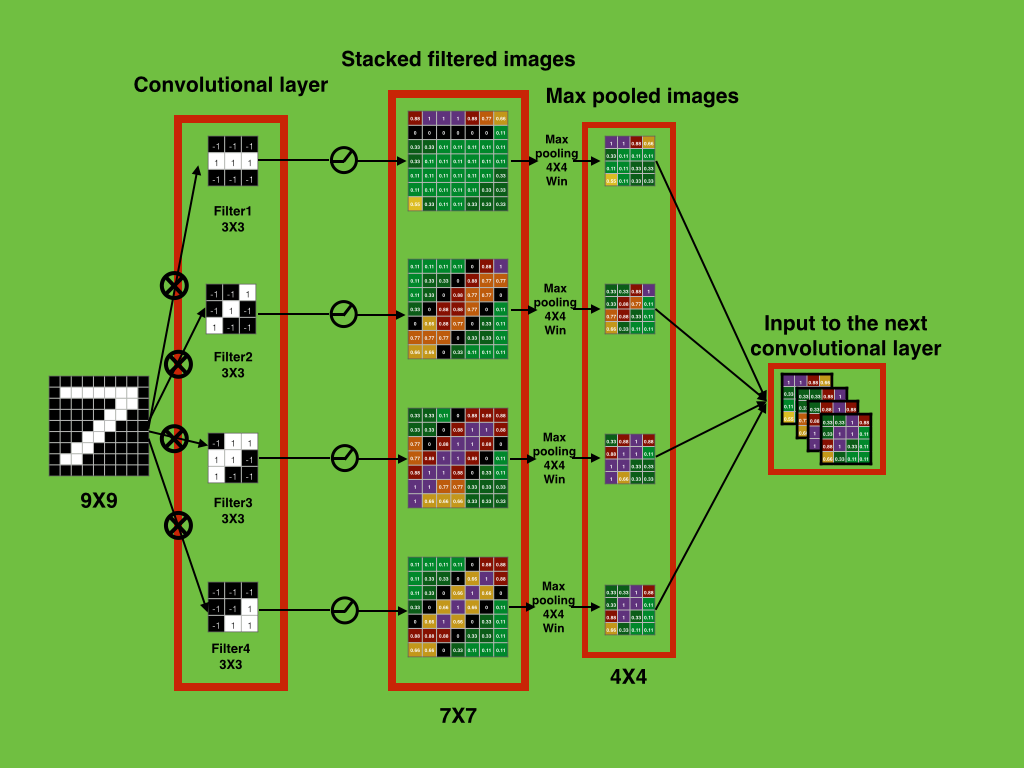

In [29]:
Image('images/cnnl.png')

## 2.5. Fully connected layer

Let's back to our orginal example where we had only one filter in the convolution layer. As said before, the output of filter is acutally a dense representation of the input with respect to a specific feature. For example, consider a filter that is responsible to capture edges in the input so its output is summarized infromation about edges in the image. Now that we have a dense representation of a feature we can use it to predict which class the image belongs to. For this first we need to flatten the dense representation of the feature. This turns the output of the filter usuable for classification. Making a flattened feature vector out of the filter output for just one filter is shown below. 

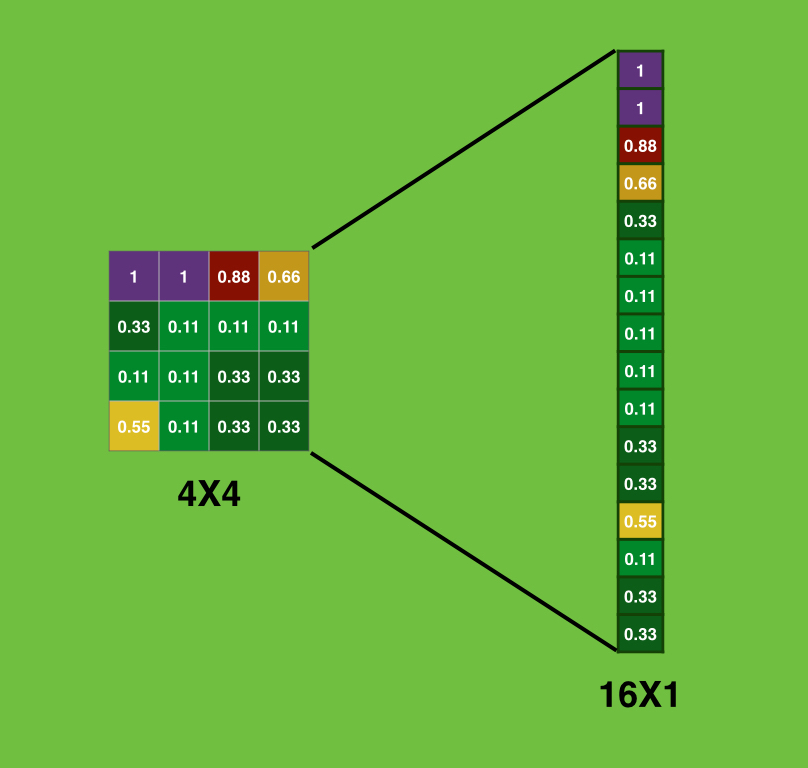

In [9]:
Image('images/flattened.png')

In our tutorial we are using MNIST dataset consists of hand-written digits from 0 to 9. Thus, the goal is to predict what digit is the input. For this, we need a fully-connected layer with size 10 in which each cell is the probability of the image being one of the digits 0 to 9.  

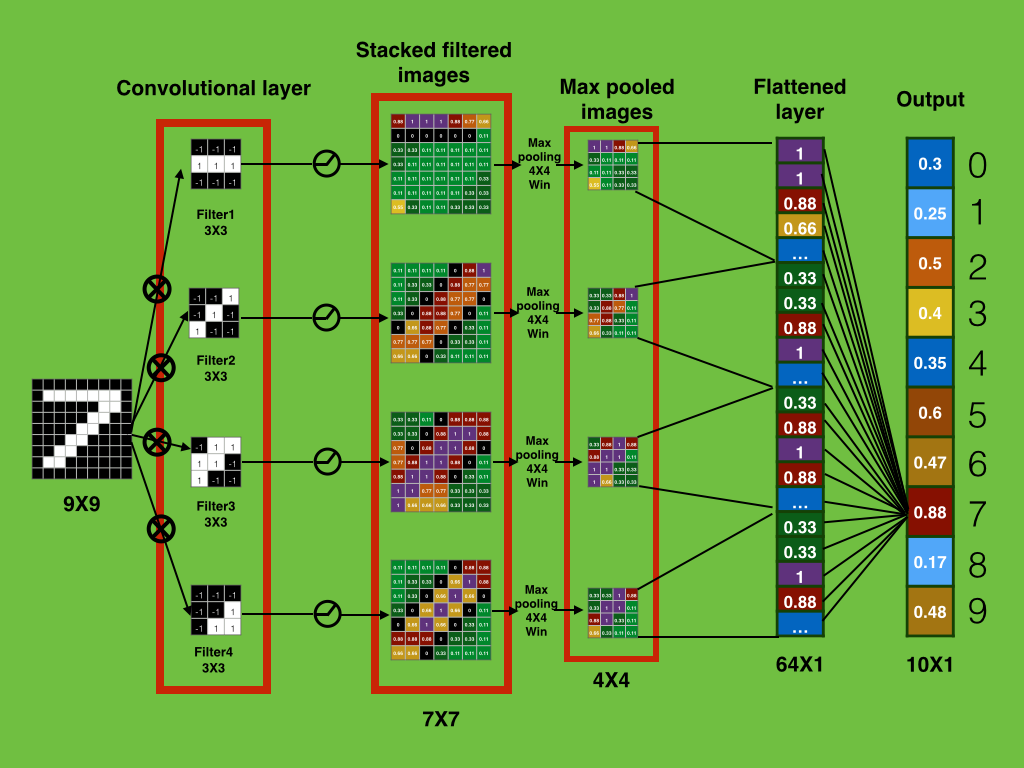

In [10]:
Image('images/overall.png')

We further assume that our convolutional neural network has only one convolution layer and one fully-connected layer.

 So far we have seen how a convolution layer works. Now, we are goning to see why it is neccessary to have a fully-connected layer.

## 2.6. Learning algorithm

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import mlp.data_providers as data_providers

In [7]:
tf.__version__

'1.3.0'

In [8]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

In [9]:
#from tensorflow.examples.tutorials.mnist import input_data
#data = input_data.read_data_sets('data/MNIST/', one_hot=True)



train_data = data_providers.MNISTDataProvider('train', batch_size=50)
valid_data = data_providers.MNISTDataProvider('valid', batch_size=50)

In [10]:
"""print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))"""

'print("Size of:")\nprint("- Training-set:\t\t{}".format(len(data.train.labels)))\nprint("- Test-set:\t\t{}".format(len(data.test.labels)))\nprint("- Validation-set:\t{}".format(len(data.validation.labels)))'

In [11]:
#data.test.cls = np.argmax(data.test.labels, axis=1)

In [12]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [13]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [14]:
""""# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)"""

'"# Get the first images from the test-set.\nimages = data.test.images[0:9]\n\n# Get the true classes for those images.\ncls_true = data.test.cls[0:9]\n\n# Plot the images and labels using our helper-function above.\nplot_images(images=images, cls_true=cls_true)'

In [15]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [16]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [17]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [18]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

In [19]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [20]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)

In [21]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

    
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)
    


In [22]:
layer_flat, num_features = flatten_layer(layer_conv2)

layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [23]:
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [24]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [25]:
"""session = tf.Session()
session.run(tf.global_variables_initializer())
"""

'session = tf.Session()\nsession.run(tf.global_variables_initializer())\n'

In [26]:
""""train_batch_size = 64
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(epoch):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(epoch):

        running_error = 0.
        running_accuracy = 0.
        
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        for x in data.train.next_batch(train_batch_size):
            print("hhh")
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    epoch += epoch

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))"""

'"train_batch_size = 64\n# Counter for total number of iterations performed so far.\ntotal_iterations = 0\n\ndef optimize(epoch):\n    # Ensure we update the global variable rather than a local copy.\n    global total_iterations\n\n    # Start-time used for printing time-usage below.\n    start_time = time.time()\n\n    for i in range(epoch):\n\n        running_error = 0.\n        running_accuracy = 0.\n        \n        # Get a batch of training examples.\n        # x_batch now holds a batch of images and\n        # y_true_batch are the true labels for those images.\n        for x in data.train.next_batch(train_batch_size):\n            print("hhh")\n        x_batch, y_true_batch = data.train.next_batch(train_batch_size)\n        # Put the batch into a dict with the proper names\n        # for placeholder variables in the TensorFlow graph.\n        feed_dict_train = {x: x_batch,\n                           y_true: y_true_batch}\n\n        # Run the optimizer using this batch of traini

In [27]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for e in range(10):
    running_error = 0.
    running_accuracy = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [optimizer, cost, accuracy], 
            feed_dict={x: input_batch, y_true: target_batch})
        running_error += batch_error
        running_accuracy += batch_acc
    running_error /= train_data.num_batches
    running_accuracy /= train_data.num_batches
    print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
          .format(e + 1, running_error, running_accuracy))
    if (e + 1) % 5 == 0:
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run([cost, accuracy],feed_dict={x: input_batch, y_true: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=0.66 acc(train)=0.83
End of epoch 02: err(train)=0.20 acc(train)=0.94
End of epoch 03: err(train)=0.14 acc(train)=0.96
End of epoch 04: err(train)=0.10 acc(train)=0.97
End of epoch 05: err(train)=0.08 acc(train)=0.97
                 err(valid)=0.08 acc(valid)=0.98
End of epoch 06: err(train)=0.07 acc(train)=0.98
End of epoch 07: err(train)=0.06 acc(train)=0.98
End of epoch 08: err(train)=0.05 acc(train)=0.98
End of epoch 09: err(train)=0.05 acc(train)=0.98
End of epoch 10: err(train)=0.04 acc(train)=0.99
                 err(valid)=0.05 acc(valid)=0.98
